In [226]:
# import pandas and numpy libraries and csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

brands_data = pd.read_csv('brands_data.csv')

In [227]:
# preview dataframe
brands_data.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,NaN,NaN,NaN,2018-01-02,2018-01-12,1,False,NaN
2,NaN,NaN,NaN,2018-01-03,2018-01-03,1,False,NaN
3,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
4,NaN,NaN,NaN,2018-01-04,2018-01-04,1,False,NaN


In [228]:
# calculate number of companies per product category
brands_data.product_category.unique()

# show first ten categories
brands_data.groupby('product_category').size()

product_category
Apparel & Jewelry                                102
Art                                               21
Automobiles                                       10
Banks                                              3
Belts                                              1
Commercial  & Professional Services               26
Consumer Durables                                 15
Consumer Services                                 12
Diversified Financials                             4
Energy                                             2
Food & Beverage                                   70
Food Distributors                                  1
Footwear                                           1
Golf Courses                                       1
Health & Medical                                  69
Health Care Supplies                               1
Insurance                                          4
Lifestyle Services                                32
Marketing                    

In [229]:
# calculate number of companies per brand category
brands_data.brand_category.unique()

# show first ten categories
brands_data.groupby('brand_category').size()[:10]

brand_category
/art and entertainment                                      1
/art and entertainment/books and literature/fan fiction     1
/art and entertainment/comics and animation                 1
/art and entertainment/dance                                1
/art and entertainment/movies and tv/movies                 1
/art and entertainment/movies and tv/television             1
/art and entertainment/music/music reference                1
/art and entertainment/music/singing                        1
/art and entertainment/radio/podcasts                       1
/art and entertainment/shows and events                    28
dtype: int64

In [230]:
# create new df that drops any NaN values in product category column
prod_df = brands_data.dropna(subset = ['product_category'])
prod_df.reset_index(inplace = True, drop = True)
prod_df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Plumdrop,/automotive and vehicles/vehicle rental,Outdoors,2018-01-11,2018-07-03,3,False,United States
1,Blind Image Designs,/business and industrial/advertising and marke...,Art,2018-01-16,2018-05-11,3,False,United States
2,The Cut Buddy,/style and fashion/beauty/hair care,Personal Care,2018-01-18,2018-03-28,3,False,United States
3,trhe,NaN,Commercial & Professional Services,2018-01-19,2018-01-22,2,False,Australia
4,VIVAX,NaN,Personal Care,2018-01-22,2018-01-22,3,False,Estonia


In [231]:
# create new dataframe with product names and neater column names
prod_filtered_df = pd.DataFrame({
    'Name': prod_df.name,
    'Product Category': prod_df.product_category,
    'Country': prod_df.address_country
})

prod_filtered_df.head()

,Name,Product Category,Country
0,Plumdrop,Outdoors,United States
1,Blind Image Designs,Art,United States
2,The Cut Buddy,Personal Care,United States
3,trhe,Commercial & Professional Services,Australia
4,VIVAX,Personal Care,Estonia


In [232]:
# create separate dataframe to prep for visualization
df = prod_filtered_df.groupby('Product Category').count()
df.reset_index(inplace = True)
df.head()

,Product Category,Name,Country
0,Apparel & Jewelry,100,75
1,Art,21,14
2,Automobiles,10,7
3,Banks,3,2
4,Belts,1,1


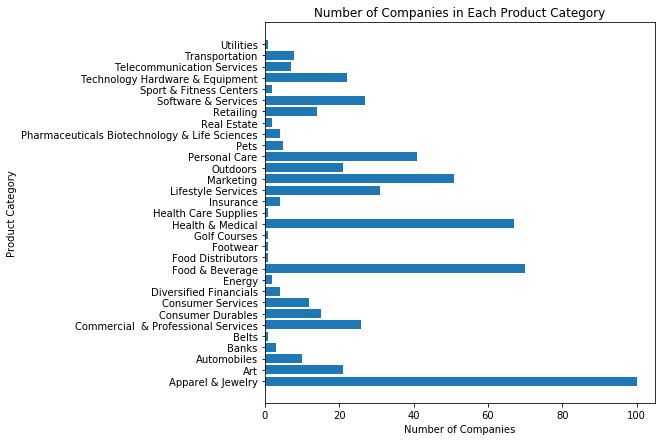

In [233]:
# create horizontal bar chart given long product category names 
x_axis = df['Product Category']
categories = df['Name']
plt.figure(figsize=(7,7))
plt.barh(x_axis, categories)
plt.xlabel('Number of Companies')
plt.ylabel('Product Category')
plt.title('Number of Companies in Each Product Category')
plt.savefig("Images/CompaniesVsProductCategory.png")

In [234]:
# create dataframe with no unknown countries
country_df = prod_filtered_df.dropna()
country_df.head()

,Name,Product Category,Country
0,Plumdrop,Outdoors,United States
1,Blind Image Designs,Art,United States
2,The Cut Buddy,Personal Care,United States
3,trhe,Commercial & Professional Services,Australia
4,VIVAX,Personal Care,Estonia


In [235]:
# sort Product Category column in alphabetical order
df2 = country_df.sort_values(by='Product Category')
df2.reset_index(inplace = True, drop = True)
df2.head()

,Name,Product Category,Country
0,Gocciolare_kings,Apparel & Jewelry,Zimbabwe
1,BakerBands,Apparel & Jewelry,United States
2,Siduna,Apparel & Jewelry,Sweden
3,Mane,Apparel & Jewelry,United States
4,Evolve,Apparel & Jewelry,United States


In [236]:
# create two metrics per brand category: number of companies in USA and number of companies outside 
usa_count = 0
international_count = 0
usa_list = []
international_list = []
for i in range(len(df2)-1):
    if df2['Product Category'][i] == df2['Product Category'][i+1]:
        if df2['Country'][i] == 'United States':
            usa_count += 1
        else:
            international_count += 1
    else:
        if df2['Country'][i] == 'United States':
            usa_count += 1
        else:
            international_count += 1
        
        # append counts to lists and reset counts
        usa_list.append(usa_count)
        international_list.append(international_count)
        usa_count = 0
        international_count = 0
        
# include transportation category at the end (for some reason isn't included in the loop)
usa_count = 0
international_count = 0
transport_df = df2.loc[df2['Product Category'] == 'Transportation']
transport_df.reset_index(inplace = True, drop = True)

for i in range(len(transport_df)):
    if transport_df['Country'][i] == 'United States':
        usa_count += 1
    else:
        international_count += 1

# append counts to lists and reset counts
usa_list.append(usa_count)
international_list.append(international_count)

# check that lists and category names are same size
print(len(usa_list))
print(len(international_list))
print(len(df2['Product Category'].unique()))

29
29
29


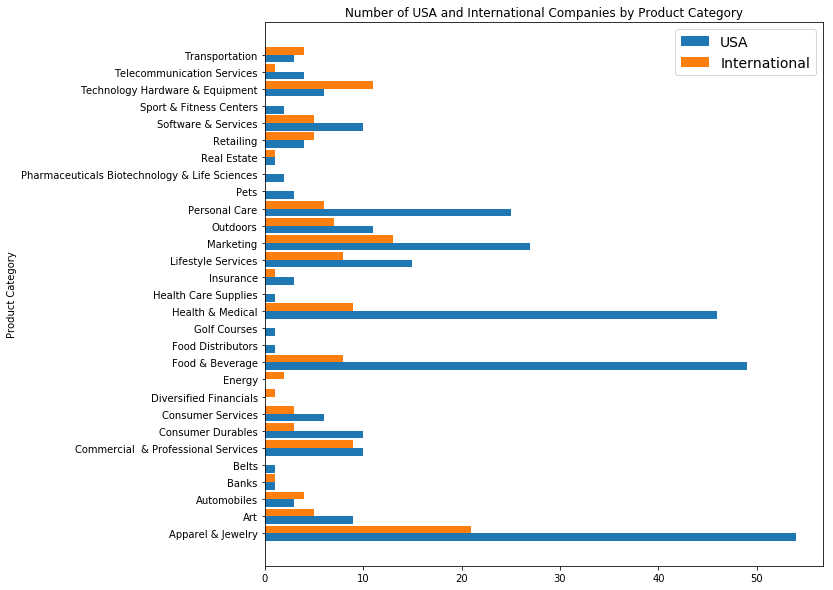

In [237]:
# create label locations of previously used y-axis categories
categories = df2['Product Category'].unique()
x = np.arange(len(categories))
width = .45

# create joined bar graph displaying number of USA and international companies in each category
fig, ax = plt.subplots(figsize=(10,10))
usa_rect = ax.barh(x - width/2, usa_list, width, label='USA')
international_rect = ax.barh(x + width/2, international_list, width, label='International')

# add text, titles, and tick labels
ax.set_ylabel('Product Category')
ax.set_title('Number of USA and International Companies by Product Category')
ax.set_yticks(x)
ax.set_yticklabels(categories)
ax.legend(fontsize=14)
plt.savefig('Images/ProductCategoryByCountry.png')

In [238]:
# create dataframe comprised of the number of USA vs International companies along with percentages
avg_int = []
for i in range(len(usa_list)):
    avg = (international_list[i]/(international_list[i] + usa_list[i])) * 100
    avg_int.append(avg)

international_brand = pd.DataFrame({
    'Product Category':categories,
    'USA':usa_list,
    'International':international_list,
    'Average International Companies':avg_int
})

# format percentages
international_brand.style.format({
    'Average International Companies':'{:.2f}%'
})

,Product Category,USA,International,Average International Companies
0,Apparel & Jewelry,54,21,28.00%
1,Art,9,5,35.71%
2,Automobiles,3,4,57.14%
3,Banks,1,1,50.00%
4,Belts,1,0,0.00%
5,Commercial & Professional Services,10,9,47.37%
6,Consumer Durables,10,3,23.08%
7,Consumer Services,6,3,33.33%
8,Diversified Financials,0,1,100.00%
9,Energy,0,2,100.00%


In [239]:
# create new df that drops any NaN values in brand category column
brand_df = brands_data.dropna(subset = ['brand_category'])
brand_df.reset_index(inplace = True, drop = True)
brand_df.head()

,name,brand_category,product_category,created,last_active,last_onboarding_step,saw_discovery,address_country
0,Milksnob,/art and entertainment/shows and events,NaN,2018-01-02,2018-06-11,3,False,United States
1,Baseball Much,/sports/baseball,NaN,2018-01-03,2018-01-03,1,False,NaN
2,Stargraph,/automotive and vehicles/motorcycles,NaN,2018-01-04,2018-08-28,1,False,NaN
3,Major League Girls,/sports/softball,NaN,2018-01-05,2018-01-07,1,False,NaN
4,Badger Sport,/style and fashion/clothing/hoodies,NaN,2018-01-08,2018-01-08,1,False,NaN


In [240]:
# take first word of each brand category for better categorization for future data visuazlization usage 
brand_cat = []
for i in range(len(brand_df.brand_category)):
    category = brand_df.brand_category[i]
    
    # first split category by '/' and create new broad category
    new_cat = category.split('/')[1]
    
    # add new category to brand_cat list
    brand_cat.append(new_cat)

# show first 10 elements
brand_cat[:10]

['art and entertainment',
 'sports',
 'automotive and vehicles',
 'sports',
 'style and fashion',
 'sports',
 'family and parenting',
 'automotive and vehicles',
 'sports',
 'business and industrial']

In [241]:
# create new dataframe with broader category names and neater column names
brand_filtered_df = pd.DataFrame({
    'Name': brand_df.name,
    'Brand Category': brand_cat,
    'Country': brand_df.address_country    
})

brand_filtered_df.head()

,Name,Brand Category,Country
0,Milksnob,art and entertainment,United States
1,Baseball Much,sports,NaN
2,Stargraph,automotive and vehicles,NaN
3,Major League Girls,sports,NaN
4,Badger Sport,style and fashion,NaN


In [242]:
# create separate dataframe to prep for visualizations
df = brand_filtered_df.groupby('Brand Category').count()
df.reset_index(inplace = True)
df.head()

,Brand Category,Name,Country
0,art and entertainment,40,33
1,automotive and vehicles,5,3
2,business and industrial,5,4
3,education,5,5
4,family and parenting,5,1


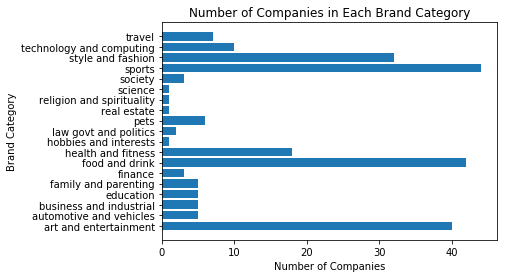

In [243]:
# create a horizontal bar chart for better visualization given long categorical names
x_axis = df['Brand Category']
categories = df['Name']
plt.barh(x_axis, categories)
plt.xlabel('Number of Companies')
plt.ylabel('Brand Category')
plt.title('Number of Companies in Each Brand Category')
plt.savefig("Images/CompaniesVsBrandCategory.png")

In [244]:
# create dataframe with no unknown countries
country_df = brand_filtered_df.dropna()
country_df.head()

,Name,Brand Category,Country
0,Milksnob,art and entertainment,United States
5,UHWK,sports,Canada
7,Plumdrop,automotive and vehicles,United States
9,Blind Image Designs,business and industrial,United States
10,The Cut Buddy,style and fashion,United States


In [245]:
# sort Brand Category column in alphabetical order
df2 = country_df.sort_values(by=['Brand Category'])
df2.reset_index(inplace = True, drop = True)
df2.head()

,Name,Brand Category,Country
0,Milksnob,art and entertainment,United States
1,The Shining Star Of India,art and entertainment,India
2,Fastlyfe,art and entertainment,United States
3,Tropical Bros,art and entertainment,United States
4,CYCLEBAR Hendersonville,art and entertainment,United States


In [246]:
# create two metrics per brand category: number of companies in USA and number of companies outside 
usa_count = 0
international_count = 0
usa_list = []
international_list = []
for i in range(len(df2)-1):
    if df2['Brand Category'][i] == df2['Brand Category'][i+1]:
        if df2['Country'][i] == 'United States':
            usa_count += 1
        else:
            international_count += 1
    else:
        if df2['Country'][i] == 'United States':
            usa_count += 1
        else:
            international_count += 1
        
        # append counts to lists and reset counts
        usa_list.append(usa_count)
        international_list.append(international_count)
        usa_count = 0
        international_count = 0

# include travel category at the end (for some reason isn't included in the loop)
usa_count = 0
international_count = 0
travel_df = df2.loc[df2['Brand Category'] == 'travel']
travel_df.reset_index(inplace = True, drop = True)

for i in range(len(travel_df)):
    if travel_df['Country'][i] == 'United States':
        usa_count += 1
    else:
        international_count += 1

# append counts to lists and reset counts
usa_list.append(usa_count)
international_list.append(international_count)

# check that lists and category names are same size
print(len(usa_list))
print(len(international_list))
print(len(df2['Brand Category'].unique()))

18
18
18


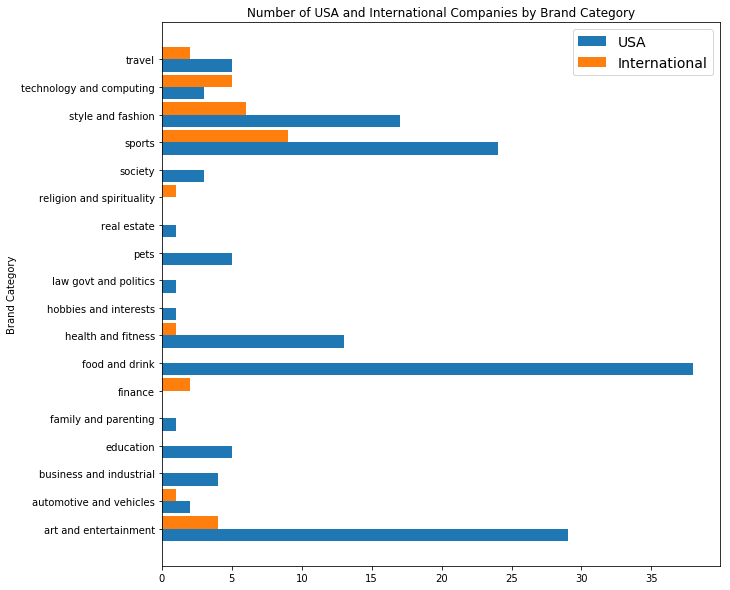

In [247]:
# create label locations of previously used y-axis categories
categories = df2['Brand Category'].unique()
x = np.arange(len(categories))
width = .45

# create joined bar graph displaying number of USA and international companies in each category
fig, ax = plt.subplots(figsize=(10,10))
usa_rect = ax.barh(x - width/2, usa_list, width, label='USA')
international_rect = ax.barh(x + width/2, international_list, width, label='International')

# add text, titles, and tick labels
ax.set_ylabel('Brand Category')
ax.set_title('Number of USA and International Companies by Brand Category')
ax.set_yticks(x)
ax.set_yticklabels(categories)
ax.legend(fontsize=14)
plt.savefig('Images/BrandCategoryByCountry.png')

In [248]:
# create dataframe comprised of the number of USA vs International companies along with percentages
avg_int = []
for i in range(len(usa_list)):
    avg = (international_list[i]/(international_list[i] + usa_list[i])) * 100
    avg_int.append(avg)

international_brand = pd.DataFrame({
    'Brand Category':categories,
    'USA':usa_list,
    'International':international_list,
    'Average International Companies':avg_int
})

# format percentages
international_brand.style.format({
    'Average International Companies':'{:.2f}%'
})

,Brand Category,USA,International,Average International Companies
0,art and entertainment,29,4,12.12%
1,automotive and vehicles,2,1,33.33%
2,business and industrial,4,0,0.00%
3,education,5,0,0.00%
4,family and parenting,1,0,0.00%
5,finance,0,2,100.00%
6,food and drink,38,0,0.00%
7,health and fitness,13,1,7.14%
8,hobbies and interests,1,0,0.00%
9,law govt and politics,1,0,0.00%
